# FEATURE SELECTION NOTEBOOK
Felix A. Westphal
DLMDWME01

### Import

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

### Parameter

In [158]:
FILE_PATH_NORMALIZED_DATA = r"../data/processed/Normalized_Input_Data.csv"
FILE_PATH_BALANCED_DATA = r"../data/processed/Balanced_Input_Data.csv"
NUM_TARGET_FEATURES = 10

### Load Data

In [159]:
input_data = pd.read_csv(FILE_PATH_BALANCED_DATA, parse_dates=[0])                        # Load input data file
print(f"Data loaded from Excel: \n{input_data.head()}")

Data loaded from Excel: 
                 tmsp    amount  success  3D_secured  Austria  Germany  \
0 2019-01-10 16:51:21  0.402244    False       False    False     True   
1 2019-01-15 22:32:40  0.081731     True       False    False    False   
2 2019-01-12 02:47:39  0.323718    False       False    False    False   
3 2019-01-06 06:55:16  0.290064     True       False     True    False   
4 2019-01-13 10:48:29  0.238782    False       False    False     True   

   Switzerland  Goldcard  Moneycard  Simplecard  UK_Card  Diners  Master  \
0        False     False      False       False     True   False    True   
1         True     False      False        True    False   False   False   
2         True     False      False        True    False   False   False   
3        False     False      False       False     True    True   False   
4        False     False      False        True    False   False    True   

    Visa  num_tries  order_id      hour  is_weekend  
0  False          2

### Univariate Selection

In [160]:
model_data = input_data.drop('tmsp', axis=1)                                                         # Remove timestamp column for training
model_data = model_data[model_data['num_tries'] == 1]
model_data = model_data.drop('order_id', axis=1)

X = model_data.drop('success', axis=1)                                                                  # Features
y = model_data['success']                                                                               # Target Variable

# --- Select k best features
bestfeatures = SelectKBest(score_func=chi2, k=NUM_TARGET_FEATURES)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(NUM_TARGET_FEATURES,'Score'))

         Specs       Score
5     Goldcard  325.031232
7   Simplecard   76.814632
1   3D_secured   68.322415
9       Diners   13.101407
8      UK_Card   12.240400
0       amount   11.052573
13        hour   11.052573
14  is_weekend    9.725345
6    Moneycard    7.026745
10      Master    5.891399


### Feature Importance

[0.42779014 0.02503927 0.00522998 0.0058207  0.0055741  0.02543108
 0.00891362 0.01180229 0.01093181 0.00718907 0.01075678 0.01009486
 0.         0.42620139 0.01922488]


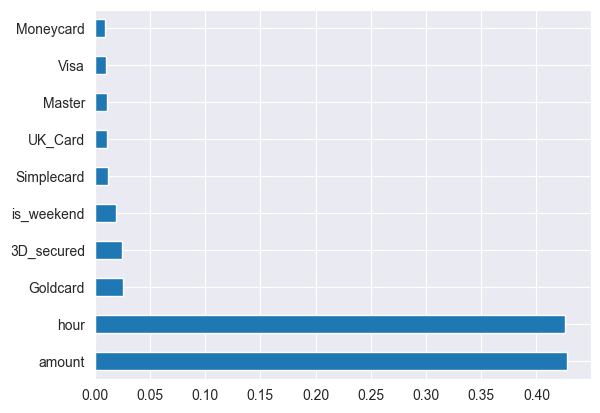

In [161]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(NUM_TARGET_FEATURES).plot(kind='barh')
plt.show()